In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
def file_list(folder):
    files = glob.glob(folder)
    sample_names =[]
    for file in files:
        sample_names.append(file[:])
    
    return sample_names

sample_name1 = file_list("./data/ALL/drive/*.csv")
sample_name2 = file_list("./data/ALL/FOV/*.csv")
sample_name3 = file_list("./data/ALL/temp/*.csv")

print(sample_name1)
print(sample_name2)
print(sample_name3)

i, j ,k = 3, 3, 3

['./data/ALL/drive\\2022-11-01-17-34-00_3p15.csv', './data/ALL/drive\\2022-11-01-18-29-06_3p15.csv', './data/ALL/drive\\2022-11-01-20-09-02_3v58.csv', './data/ALL/drive\\2022-11-02-15-23-42_3v58.csv']
['./data/ALL/FOV\\2022-11-01-17-34-10_FOV_3p15.csv', './data/ALL/FOV\\2022-11-01-18-29-27_FOV_3p15.csv', './data/ALL/FOV\\2022-11-01-20-09-13_FOV_3v58.csv', './data/ALL/FOV\\2022-11-02-15-24-04_FOV_3v58.csv']
['./data/ALL/temp\\2022-11-01-16-43-37_temp_3p15.csv', './data/ALL/temp\\2022-11-01-18-26-24_temp_3p15.csv', './data/ALL/temp\\2022-11-01-20-07-52_temp_3v58.csv', './data/ALL/temp\\2022-11-02-14-58-58_temp_3v58.csv']


In [3]:
# file
file_drive = sample_name1[i]
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

2022-11-02-15-23-42_3v58


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/11/02 13:33:41,37.631226,26.921539,461097.0,1214408.0,3457.976716,1809.701089,3.249499e+15,1.620067e+15,13.6,14.6
1,2022/11/02 13:33:43,37.614441,26.956253,461097.0,1214408.0,3321.313109,1854.644353,3.249500e+15,1.620068e+15,13.6,14.6
2,2022/11/02 13:33:45,37.599182,26.921539,461097.0,1214408.0,3310.534918,1860.920482,3.249498e+15,1.620067e+15,13.6,14.6
3,2022/11/02 13:33:46,37.559509,26.934891,461097.0,1214408.0,3312.298040,1853.480890,3.249495e+15,1.620065e+15,13.6,14.6
4,2022/11/02 13:33:48,37.568665,26.953583,461097.0,1214408.0,3320.904575,1847.993664,3.249492e+15,1.620064e+15,13.6,14.6


In [4]:
# file
file_drive =  sample_name2[j]
df2 = pd.read_csv(file_drive, index_col=0)
df2.head()

,Time,-x,+x,2x,-y,+y,2y
0,2022/11/02 13:33:36,-27.274355,27.828764,55.10312,-18.779317,19.163298,37.942615
1,2022/11/02 13:33:37,-27.274355,27.828764,55.10312,-18.779317,19.163298,37.942615
2,2022/11/02 13:33:38,-27.274355,27.828764,55.10312,-18.779317,19.163298,37.942615
3,2022/11/02 13:33:39,-27.274355,27.828764,55.10312,-18.779317,19.163298,37.942615
4,2022/11/02 13:33:41,-27.274355,27.828764,55.10312,-18.779317,19.163298,37.942615


In [5]:
#file
file_drive = sample_name3[k]
df3 = pd.read_csv(file_drive, index_col=0)
df3.head()

,Time,set_temperature,temperature,param1,param2,param3,param4
0,2022/11/02 13:32:57,25.0,24.91102,76.0,4.449000,0.000110,71.842842
1,2022/11/02 13:32:58,25.0,24.91102,24.0,4.449000,0.005723,19.547629
2,2022/11/02 13:33:00,25.0,24.99995,0.0,0.002513,0.010141,0.011220
3,2022/11/02 13:33:01,25.0,24.91102,24.0,4.449000,0.012944,19.828876
4,2022/11/02 13:33:02,25.0,24.99995,0.0,0.002513,0.012951,0.010954


In [6]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time2 = pd.to_datetime(df2["Time"]) 
time2 = time2.dt.round("s")

time3 = pd.to_datetime(df3["Time"]) 
time3 = time3.dt.round("s")
time3[len(time3)-1]

Timestamp('2022-11-02 14:58:58')

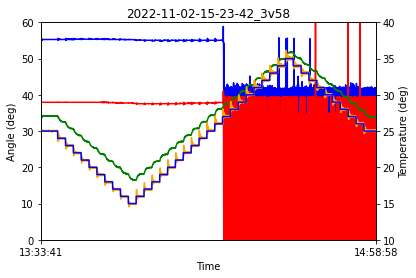

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,60)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')


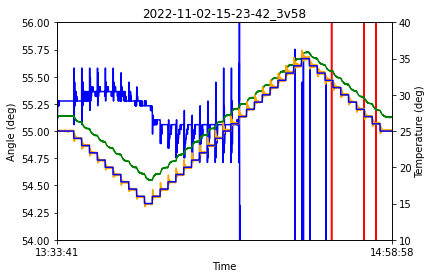

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(54,56)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

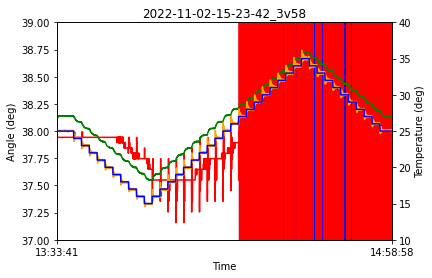

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(37,39)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

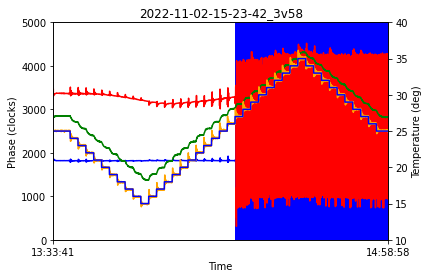

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]
plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,5000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

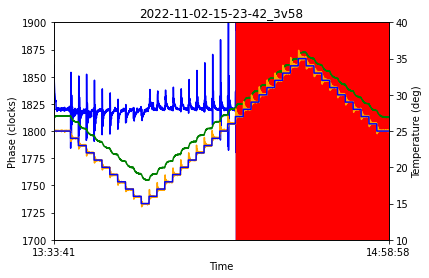

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1700,1900)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

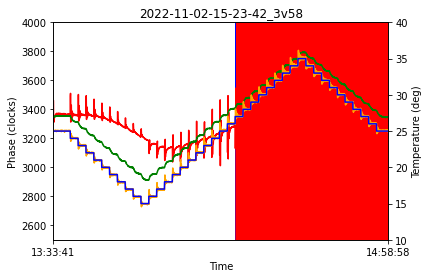

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(2500,4000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

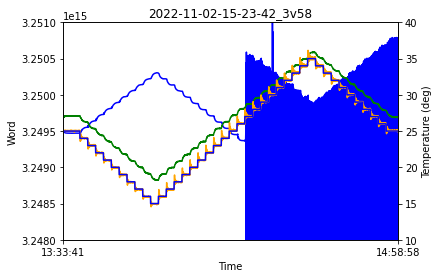

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3.248e15,3.251e15)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

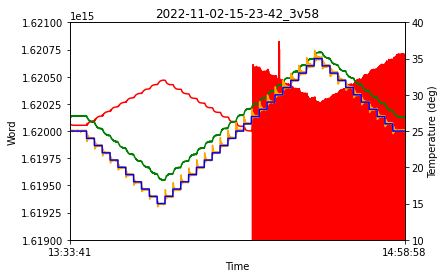

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1.619e15,1.621e15)
ax2.set_ylim(10,40)

#ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
ax2.plot(time3, df3["set_temperature"], color='b')

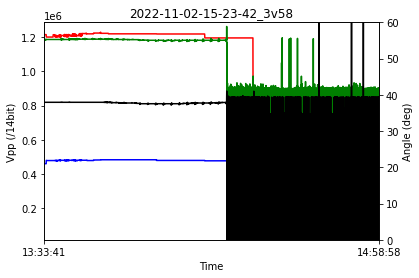

In [15]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Vpp (/14bit)")
ax2.set_ylabel("Angle (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]
plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,5000)
ax2.set_ylim(0,60)

ax1.plot(time1, df1["vpp_sum1"], color='b')
ax1.plot(time1, df1["vpp_sum2"], color='r')
ax2.plot(time2, df2["2x"], color='g')
ax2.plot(time2, df2["2y"], color='k')